# Efficiency of Peak Detection Methods

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
%%capture
temp_repo_dir = "/home/kai/KEMALINECIK/from_raf_computer/Kemal/Temp/human"
data_repo_dir = "/home/kai/KEMALINECIK/from_raf_computer/Kemal/Data/sam_bukau"
script_path_infrastructure = "/home/kai/KEMALINECIK/from_raf_computer/Kemal/RiboSeqAnalysis/infrastructure"
import sys
sys.path.insert(0, '/home/kai/KEMALINECIK/from_raf_computer/Kemal/RiboSeqAnalysis')
from infrastructure.main import *

spt = [os.path.join(data_repo_dir, i) for i in ["Sixtymers_TT1.sam", "Sixtymers_TT2.sam"]]
sps = [os.path.join(data_repo_dir, i) for i in ["Sixtymers_Rep1.sam", "Sixtymers_Rep2.sam", "Sixtymers_NoPK.sam"]]

erb_serb = [os.path.join(data_repo_dir, f"SeRP/EBP1/Rep{i+1}/IP/IP{i+1}.sam") for i in range(2)]
erb_total = [os.path.join(data_repo_dir, f"SeRP/EBP1/Rep{i+1}/Total/Total{i+1}.sam") for i in range(2)]
nac_serb = [os.path.join(data_repo_dir, f"SeRP/NAC/Rep{i+1}/IP/IP{i+1}.sam") for i in range(2)]
nac_total = [os.path.join(data_repo_dir, f"SeRP/NAC/Rep{i+1}/Total/Total{i+1}.sam") for i in range(2)]

coco_d = [os.path.join(data_repo_dir, i) for i in ["Coco_Dis1.sam", "Coco_Dis2.sam"]]
coco_m = [os.path.join(data_repo_dir, i) for i in ["Coco_Mono1.sam", "Coco_Mono2.sam"]]

exclude_genes = ["ENSG00000160789"]

I = Infrastructre(temp_repo_dir,
                  exclude_genes=exclude_genes,
                  ensembl_release=102,
                  organism="homo_sapiens",
                  #include_gene3d=True,
                  verbose=True)

## Metagene Profiles of A-site assignment for Sixtymers Data

In [3]:
I.riboseq_sixtymers = RiboSeqSixtymers(I.temp_repo_dir, spt, sps, "sixtymers",
                                        riboseq_assign_to="best_transcript", riboseq_assign_at="auto",
                                        protein_genome_instance=I.protein_genome,
                                        gene_info_dictionary=I.gene_info,
                                        exclude_genes=I.exclude_genes, verbose=I.verbose)

[15/04/2021 14:19:46 CEST] Footprints are being assigned to genomic coordinates.
Progress: |████████████████████| 100.0% 
Progress: |████████████████████| 100.0% 
[15/04/2021 14:23:05 CEST] Gene assignments are being calculated for footprints with length 23, 24, 25, 26, 27, 28, 29, 30, 31, 32.
[15/04/2021 14:28:28 CEST] The calculated offsets are as follows:
     0   1   2
23 -12 -15 -12
24 -12 -12 -12
25 -12  -9 -12
26 -15 -15 -15
27 -12  -9 -15
28 -12 -12 -12
29 -12 -12 -12
30 -15 -12 -12
31 -15 -15 -12
32 -15 -15 -12
[15/04/2021 14:28:29 CEST] Instance is being written to directory.
[15/04/2021 14:28:38 CEST] Done: /home/kai/KEMALINECIK/from_raf_computer/Kemal/Temp/human/riboseq_sixtymers_background.joblib
[15/04/2021 14:28:42 CEST] Footprints are being assigned to genomic coordinates.
Progress: |████████████████████| 100.0% 
Progress: |████████████████████| 100.0% 
Progress: |████████████████████| 100.0% 
[15/04/2021 14:31:43 CEST] Gene assignments are being calculated for footprin

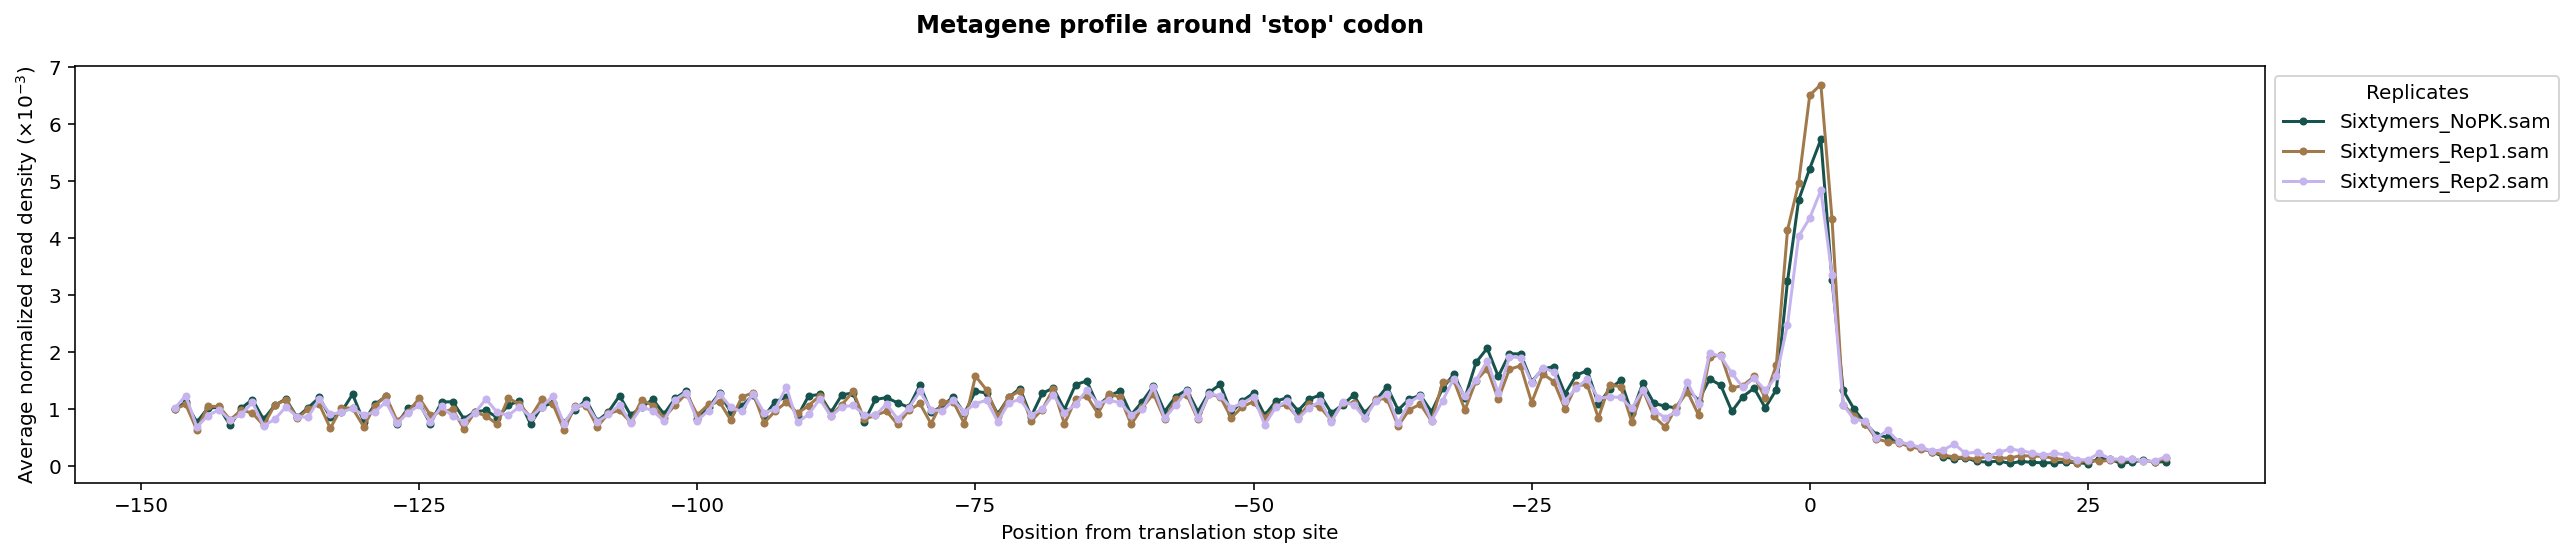

In [4]:
_=I.riboseq_sixtymers.experiment.metagene_at_ends("stop", 180, 1, I.riboseq_sixtymers.experiment.gene_assignments, I.riboseq_sixtymers.experiment.flanking_assignments, True)

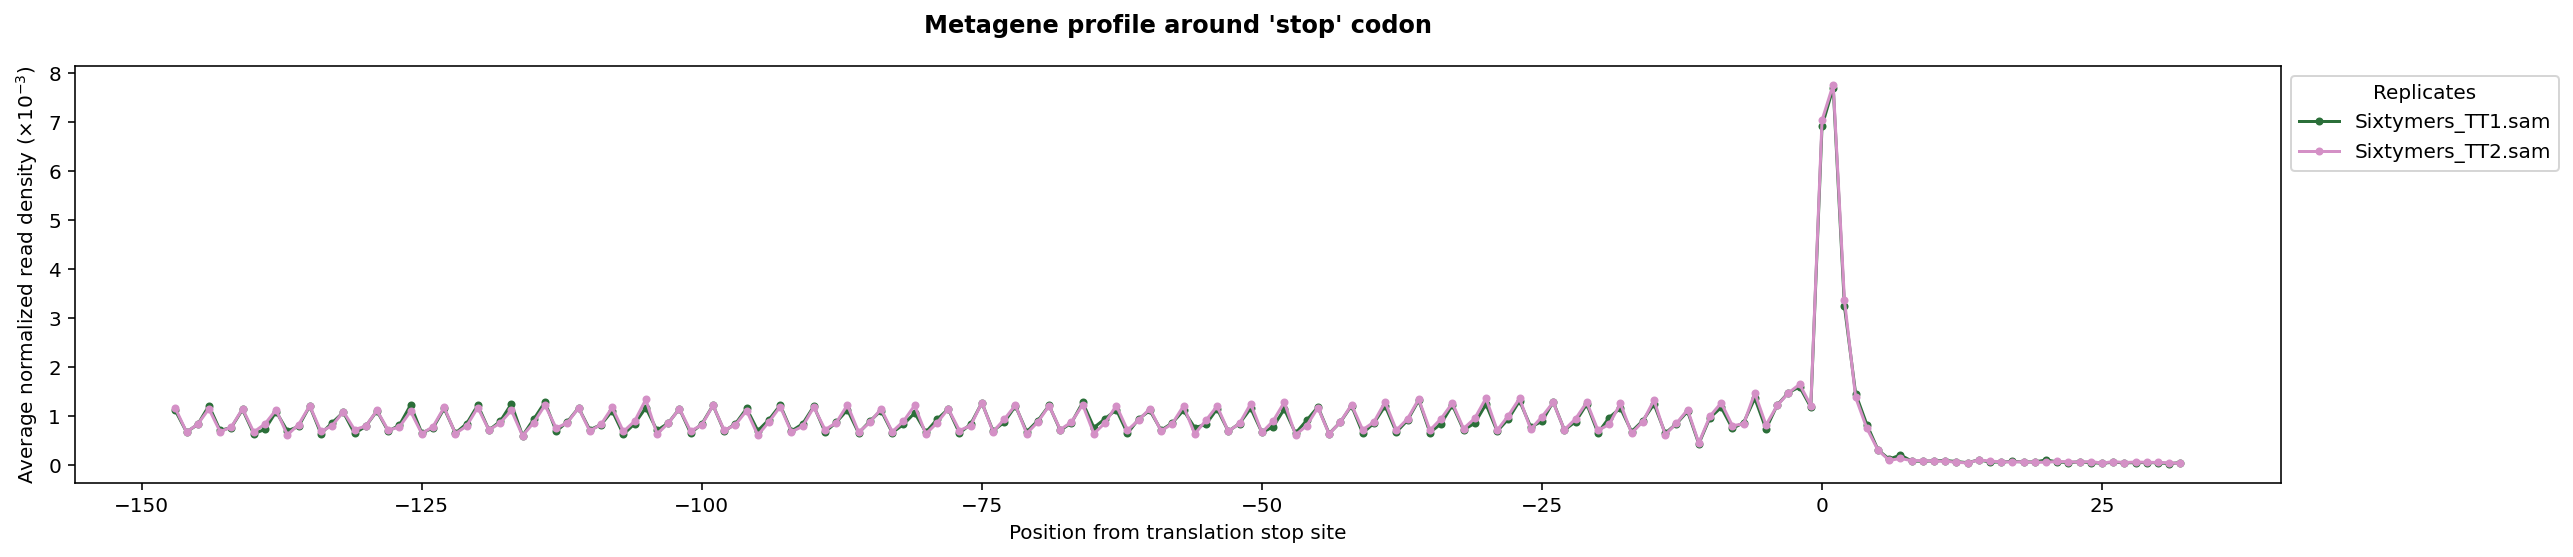

In [5]:
_=I.riboseq_sixtymers.background.metagene_at_ends("stop", 180, 1, I.riboseq_sixtymers.background.gene_assignments, I.riboseq_sixtymers.background.flanking_assignments, True)

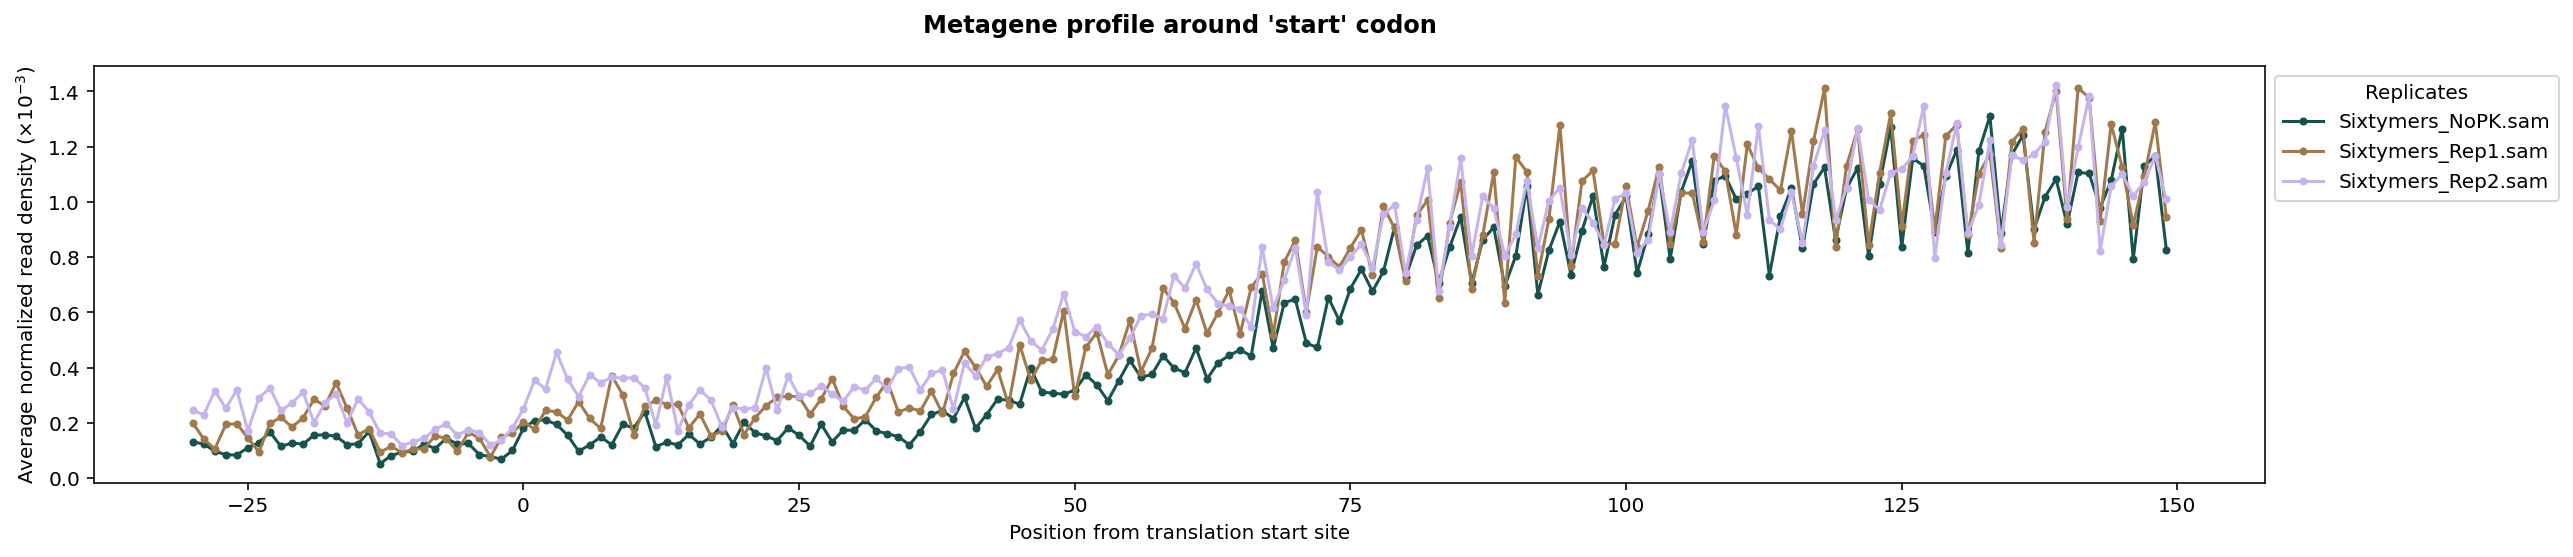

In [6]:
_=I.riboseq_sixtymers.experiment.metagene_at_ends("start", 180, 1, I.riboseq_sixtymers.experiment.gene_assignments, I.riboseq_sixtymers.experiment.flanking_assignments, True)

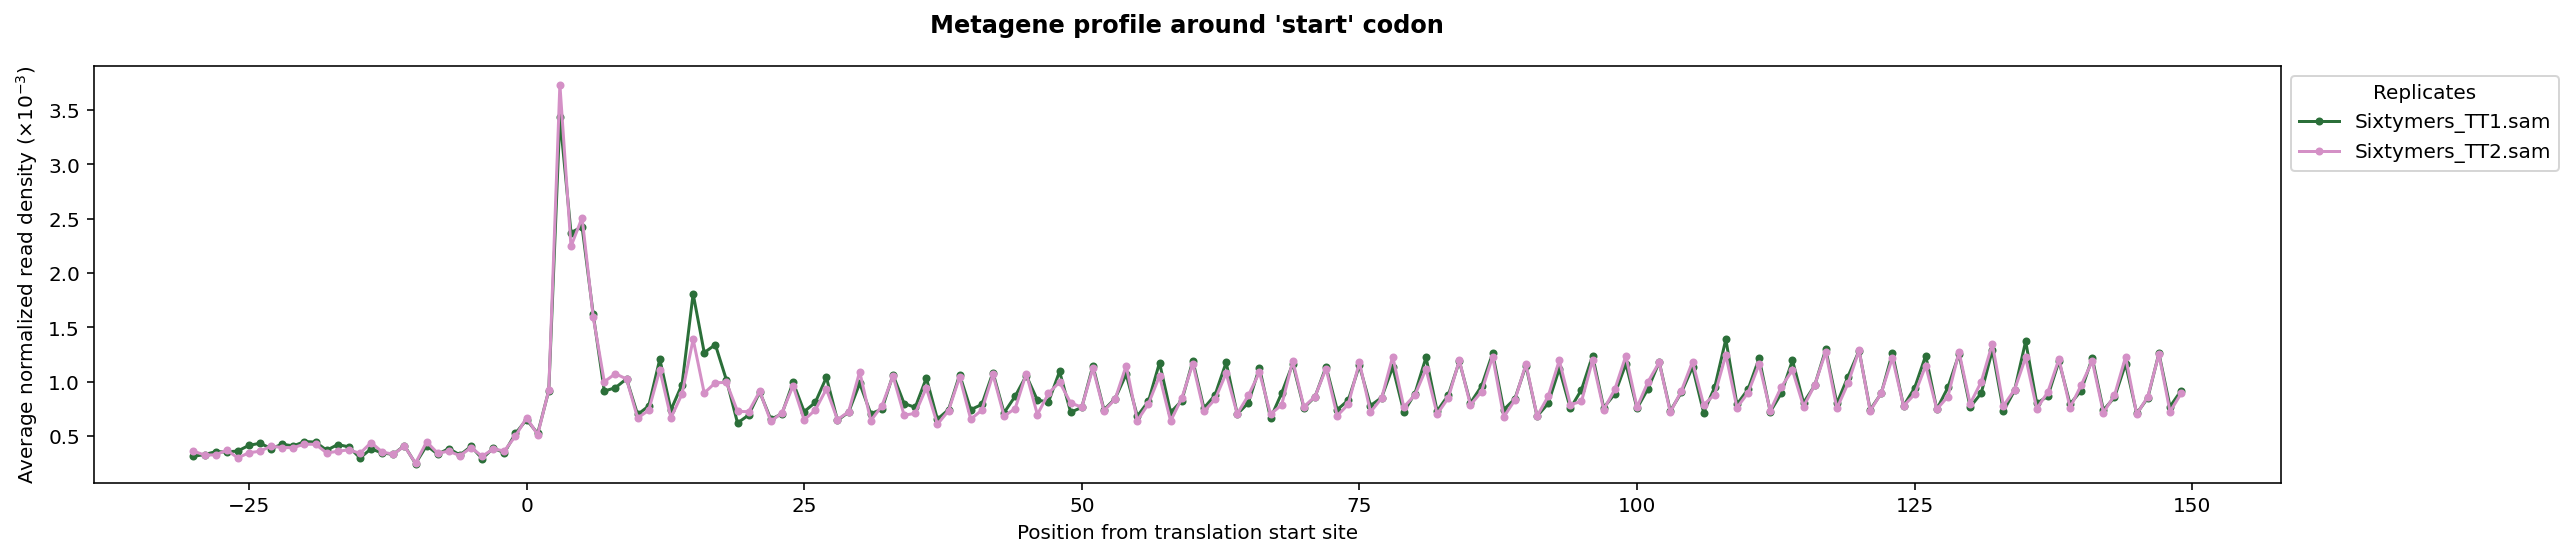

In [7]:
_=I.riboseq_sixtymers.background.metagene_at_ends("start", 180, 1, I.riboseq_sixtymers.background.gene_assignments, I.riboseq_sixtymers.background.flanking_assignments, True)

## Metagene Profiles of A-site assignment for CocoAssembly Data

In [13]:
# Should be first to calculate, since multiprocessing is quite memory inefficient.
I.riboseq_coco = RiboSeqCoco(I.temp_repo_dir, coco_m, coco_d, "cocoassembly",
                             riboseq_assign_to="best_transcript", riboseq_assign_at=-15,
                             protein_genome_instance=I.protein_genome,
                             gene_info_dictionary=I.gene_info,
                             exclude_genes=I.exclude_genes, verbose=I.verbose)

[15/04/2021 15:39:15 CEST] RiboSeq assignment for cocoassembly_background found in path: /home/kai/KEMALINECIK/from_raf_computer/Kemal/Temp/human/riboseq_cocoassembly_background.joblib
[15/04/2021 15:39:21 CEST] There is at least one inconsistency between input parameters and loaded content. Recalculating.
[15/04/2021 15:39:25 CEST] Footprints are being assigned to genomic coordinates.
Progress: |████████████████████| 100.0% 
[15/04/2021 15:41:49 CEST] 61 footprints were skipped because assignment index was out of range.
Progress: |████████████████████| 100.0% 
[15/04/2021 15:44:28 CEST] 62 footprints were skipped because assignment index was out of range.
[15/04/2021 15:44:29 CEST] Gene assignments are being calculated for footprints with all lengths.
[15/04/2021 15:45:43 CEST] Instance is being written to directory.
[15/04/2021 15:45:49 CEST] Done: /home/kai/KEMALINECIK/from_raf_computer/Kemal/Temp/human/riboseq_cocoassembly_background.joblib
[15/04/2021 15:45:49 CEST] RiboSeq assign

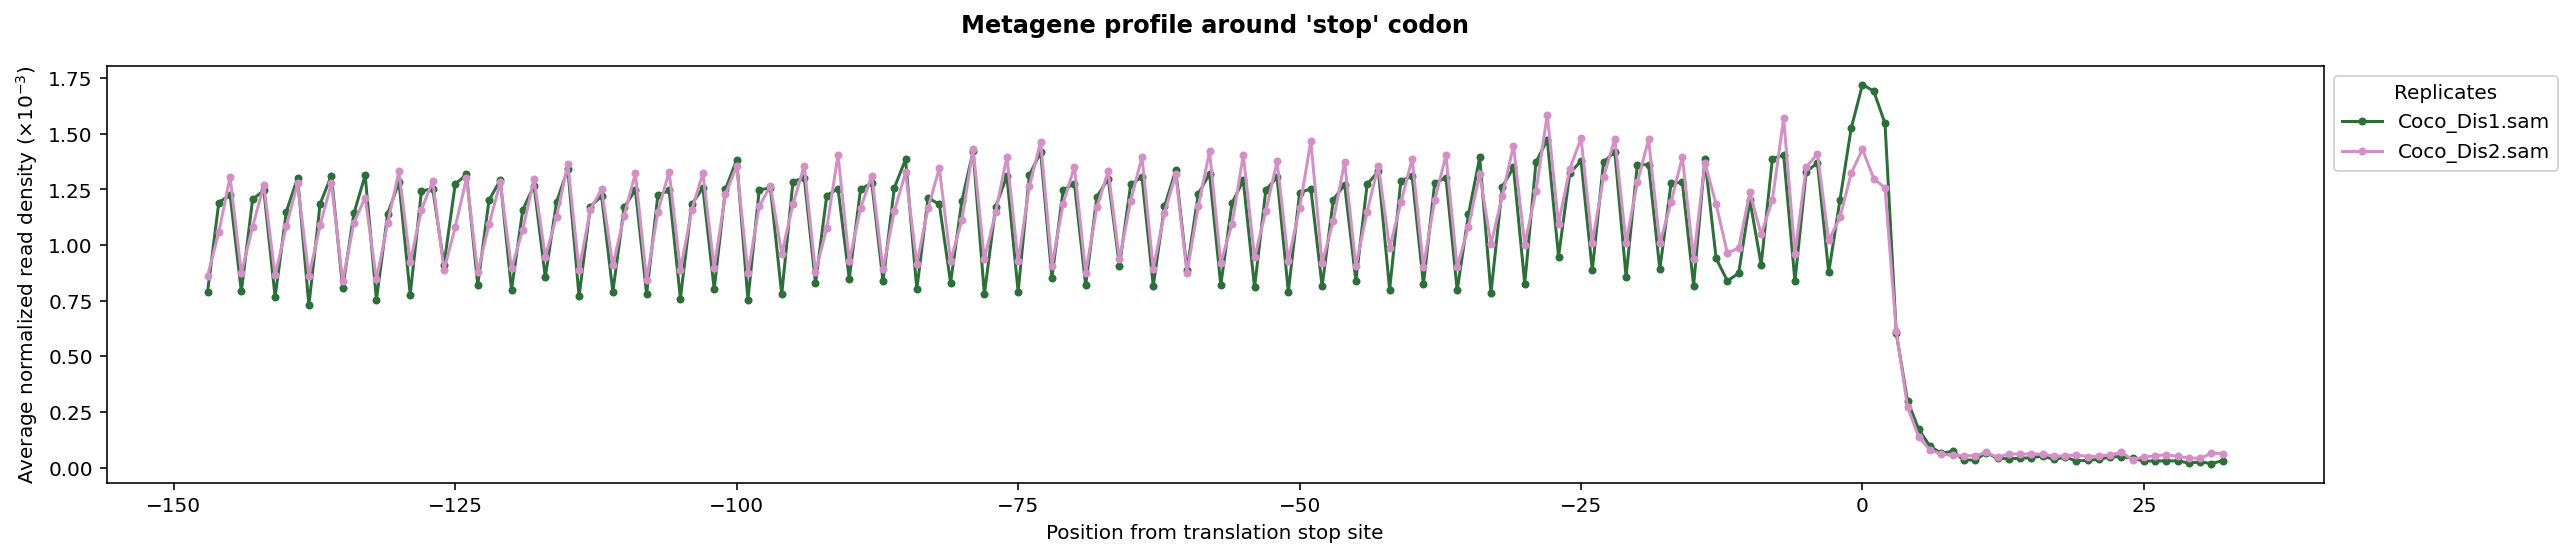

In [14]:
_=I.riboseq_coco.experiment.metagene_at_ends("stop", 180, 1, I.riboseq_coco.experiment.gene_assignments, I.riboseq_coco.experiment.flanking_assignments, True)

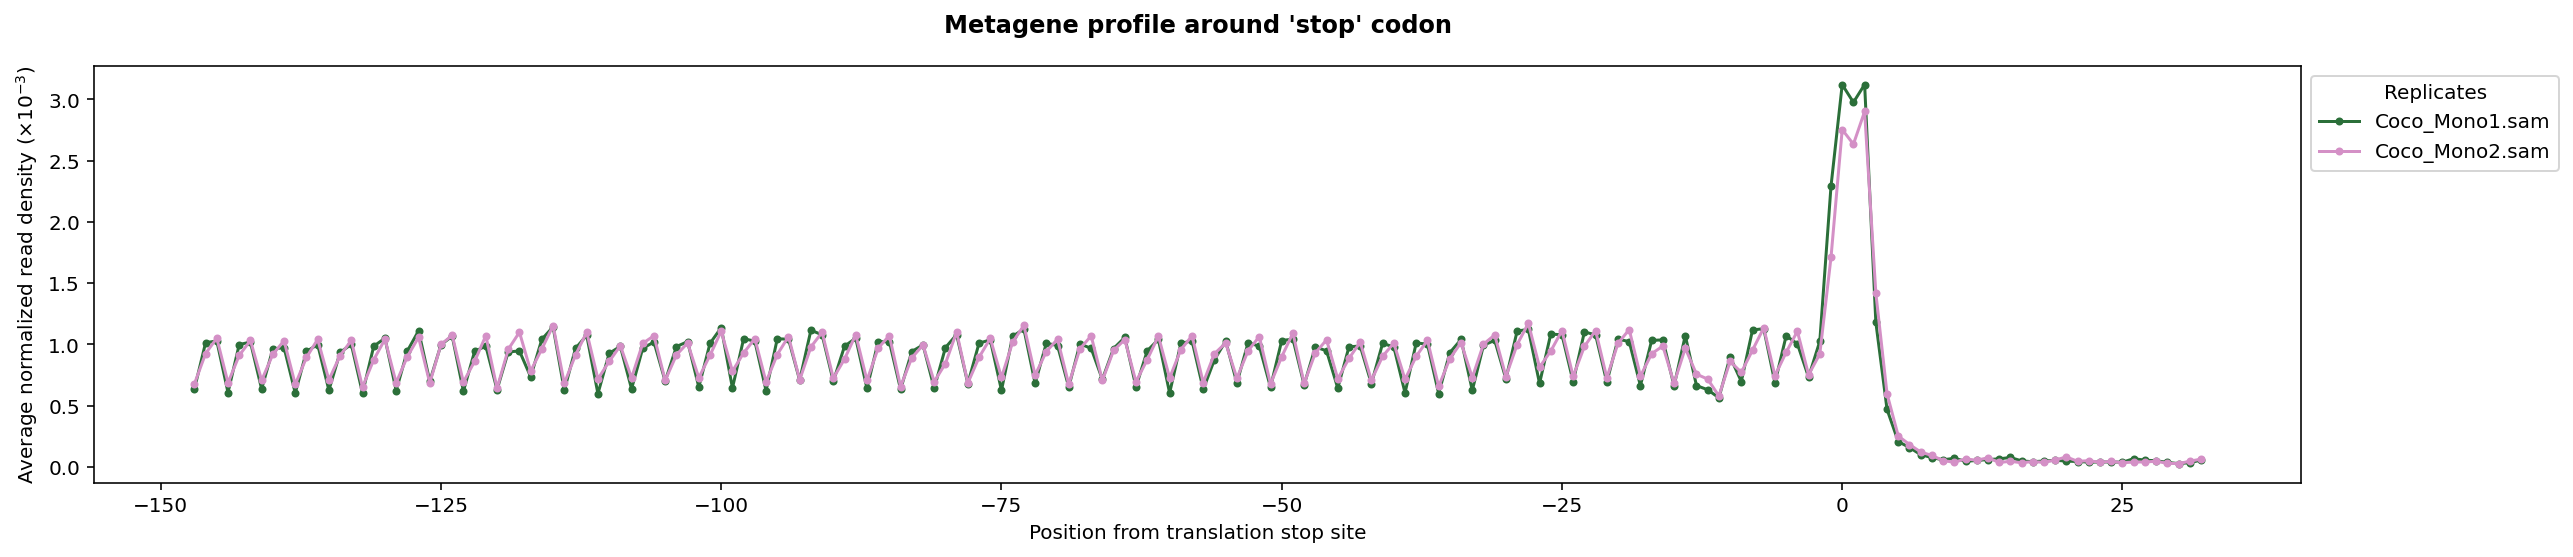

In [15]:
_=I.riboseq_coco.background.metagene_at_ends("stop", 180, 1, I.riboseq_coco.background.gene_assignments, I.riboseq_coco.background.flanking_assignments, True)


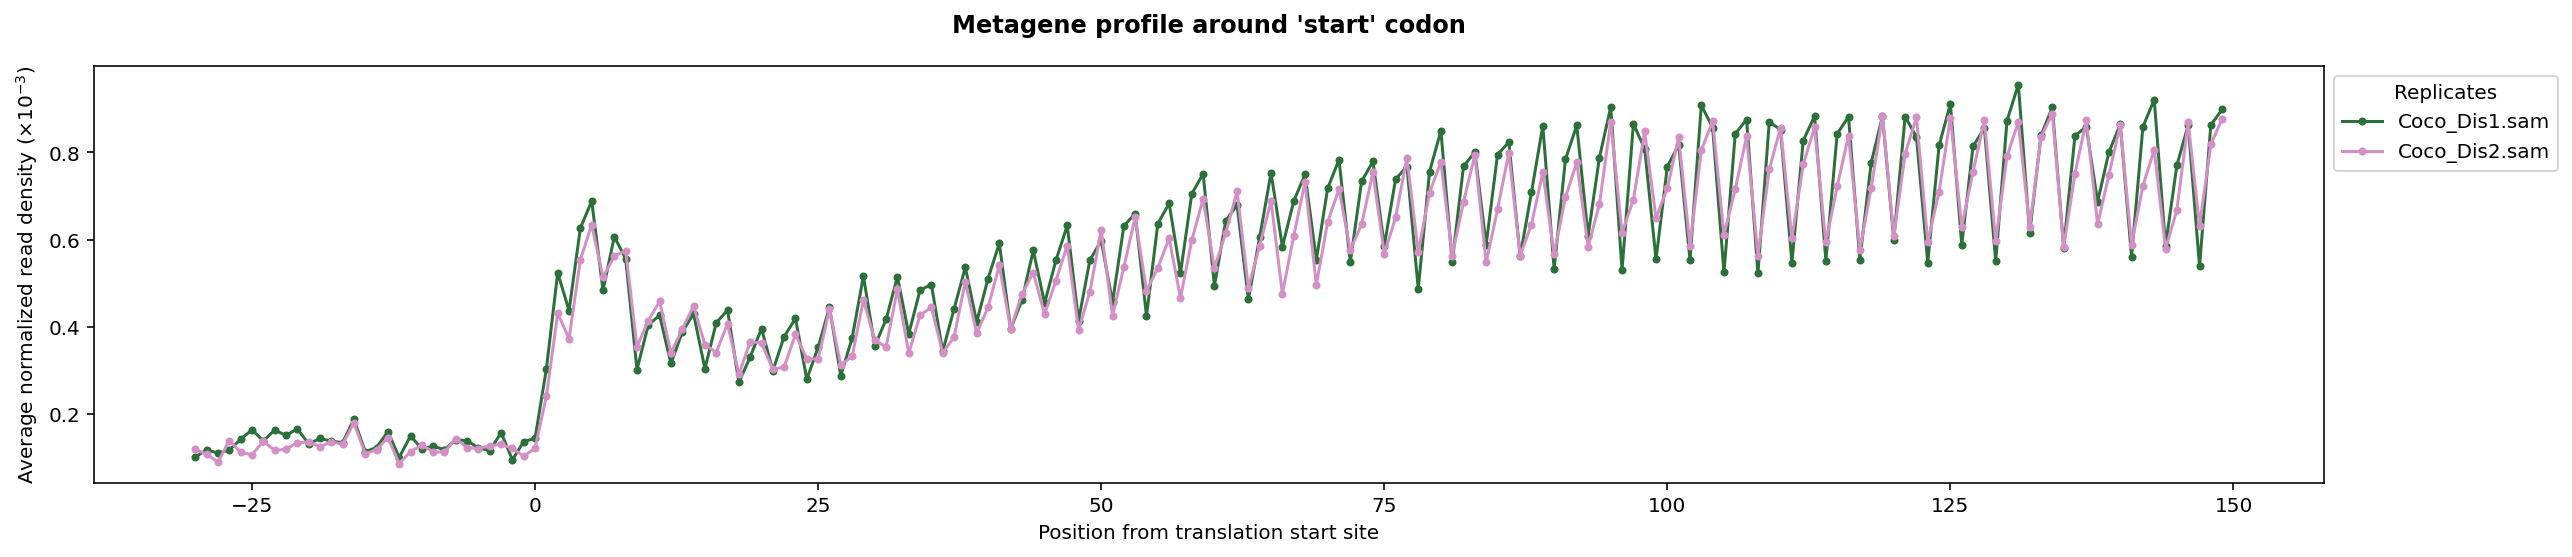

In [16]:
_=I.riboseq_coco.experiment.metagene_at_ends("start", 180, 1, I.riboseq_coco.experiment.gene_assignments, I.riboseq_coco.experiment.flanking_assignments, True)


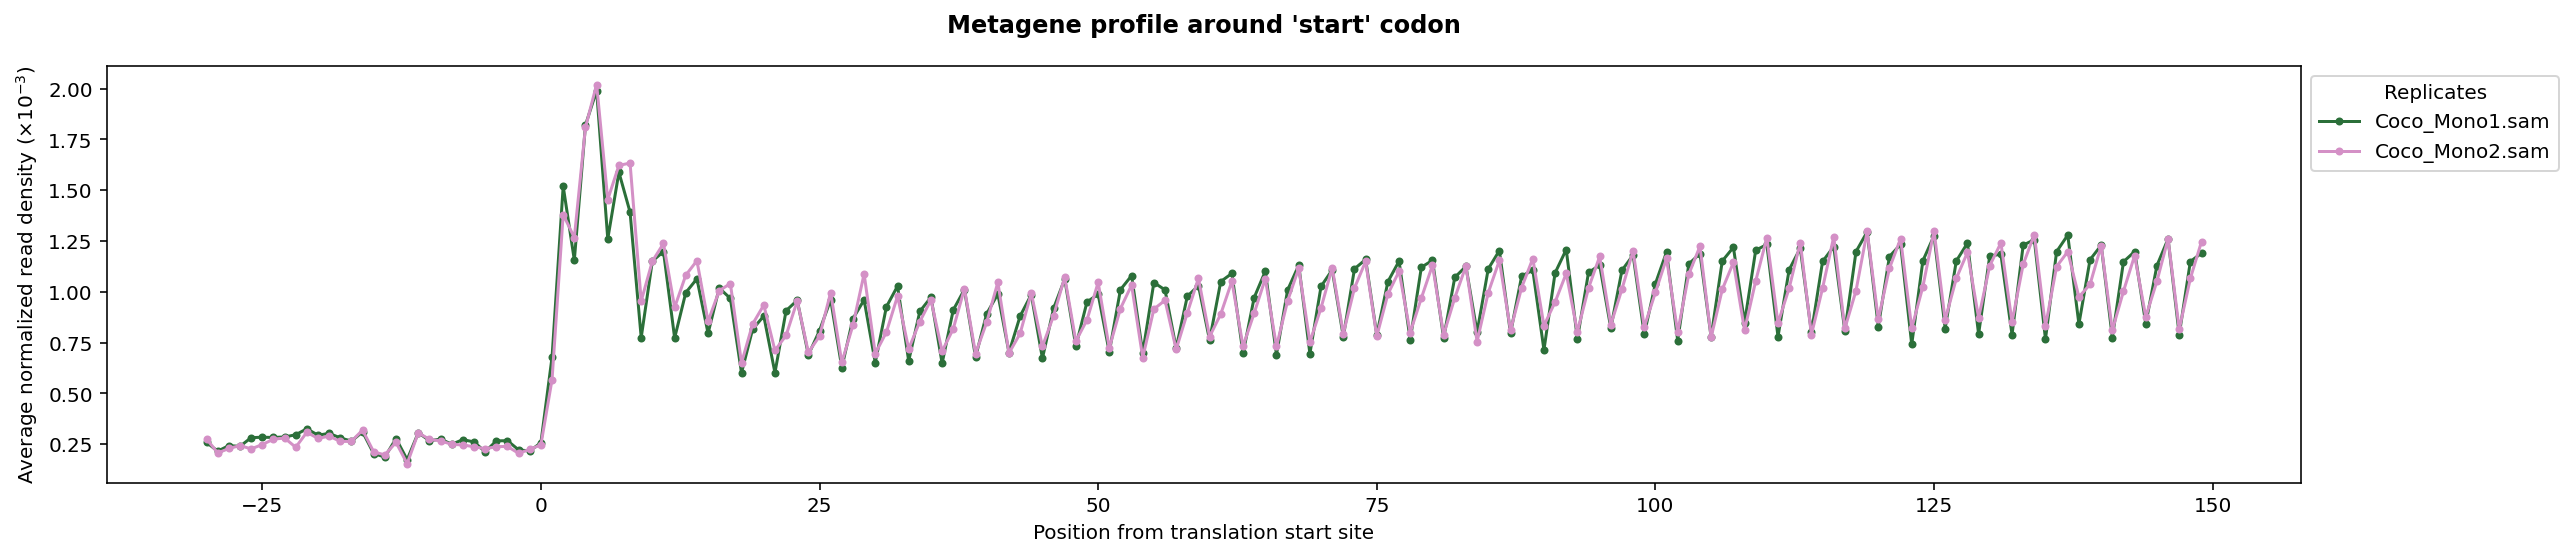

In [17]:
_=I.riboseq_coco.background.metagene_at_ends("start", 180, 1, I.riboseq_coco.background.gene_assignments, I.riboseq_coco.background.flanking_assignments, True)